# ML project-Decision Tree Regressor

> Indented block



## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

df = pd.read_csv("Travel details dataset2.csv")



## Importing the dataset

In [12]:
df

,Trip ID,Destination,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Overall Travel Budget
0,1,London,5/8/2023,7,John Smith,35,Male,American,Hotel,12000,Flight,600,40000
1,2,Phuket,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,8000,Flight,500,50000
2,3,Bali,7/8/2023,7,David Lee,45,Male,Korean,Villa,10000,Flight,700,20000
3,4,NewYork,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,20000,Flight,1000,90000
4,5,Tokyo,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,7000,Train,200,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,135,RiodeJaneiro,8/10/2023,9,Jose Perez,37,Male,Brazilian,Hostel,25000,Car,2000,87000
133,136,Vancouver,8/21/2023,6,Emma Wilson,29,Female,Canadian,Hotel,50000,Flight,3000,45000
134,137,Bangkok,9/8/2023,7,Ryan Chen,34,Male,Chinese,Hostel,20000,Train,1000,87000
135,138,Barcelona,9/22/2023,7,Sofia Rodriguez,25,Female,Spanish,Airbnb,60000,Flight,2500,90000


In [3]:
X = df.iloc[:, [1, 3,8,12]].values
y= df.iloc[:, 9].values

In [ ]:
X

In [ ]:
y

array([1200,  800, 1000, 2000,  700, 1500,  500,  900, 1200, 2500, 1000,
        800, 3000, 1400,  600,  900,  900, 1500, 1200, 1200,  600, 1000,
        700,  400, 1400, 2000, 1100,  800,  200,  600, 1000,  150,  400,
        700,  500,  180,  900,  350, 1400,  800,  500, 2200, 1200,  900,
        600, 1500,  500,  400, 1100, 1200,  500,  900, 1400,  800,  400,
       1000,  700,  500, 1200,  800, 1200,  400,  800, 1500,  900, 2200,
       1100, 1000,  300, 1300, 1800,  500, 1000,  800, 1200,  400,  600,
        900,  400, 1500,  700,  100,  800,  500, 1200,  900,  700,  300,
       1000, 4000,  200, 1500,  800,  500,  400,  200,  600,  800,  700,
        300,  500,  900, 1200,  600, 1000,  800, 1200, 1500,  300,  900,
       2000, 1100, 1000, 1500,  200, 1000, 1200,  800,  900,  500, 1300,
        700, 1200,  900,  400,  800, 5000, 7000, 3000, 6000, 4000, 8000,
       2500, 5000, 2000, 6000, 7000])

In [3]:
df['Accommodation type'].unique()


array(['Hotel', 'Resort', 'Villa', 'Airbnb', 'Hostel', 'Riad',
       'Vacation rental', 'Guesthouse'], dtype=object)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Trip ID                137 non-null    int64 
 1   Destination            137 non-null    object
 2   End date               137 non-null    object
 3   Duration (days)        137 non-null    int64 
 4   Traveler name          137 non-null    object
 5   Traveler age           137 non-null    int64 
 6   Traveler gender        137 non-null    object
 7   Traveler nationality   137 non-null    object
 8   Accommodation type     137 non-null    object
 9   Accommodation cost     137 non-null    int64 
 10  Transportation type    137 non-null    object
 11  Transportation cost    137 non-null    int64 
 12  Overall Travel Budget  137 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 14.0+ KB


## Label encoding the data

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
X

## Splitting the dataset into the Training set and Test set

In [6]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [13]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(X,y)

## Building the model

In [7]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X, y)

DecisionTreeRegressor()

## Predicting a Test results

In [30]:
new_data = ['NewYork',3, 'Hotel',50000]

# Use label encoder for categorical variables
new_data[0] = le.fit_transform([new_data[0]])[0]
new_data[2] = le.fit_transform([new_data[2]])[0]

# Reshape the numerical values to fit the expected format
new_data_reshaped = [new_data]

# Make prediction
predict1 = tree.predict(new_data_reshaped)

print("Predicted Label:", predict1)

Predicted Label: [7000.]


In [8]:
predictions = tree.predict(X_test)



Text(0, 0.5, 'Predicted Y')

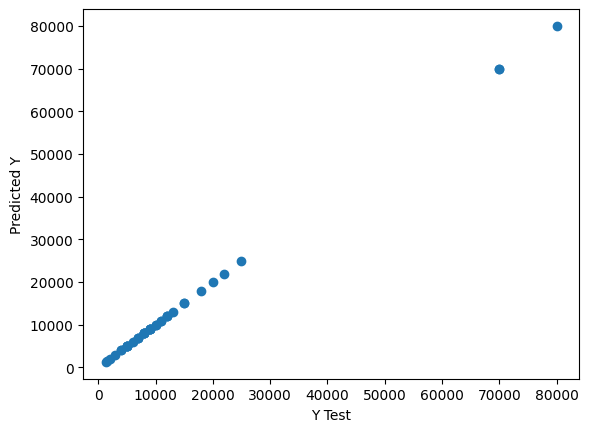

In [9]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Getting the results

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
# Calculation of Metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2:',metrics.r2_score(y_test,predictions))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
R^2: 1.0


<ipython-input-29-cb18feeff719>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


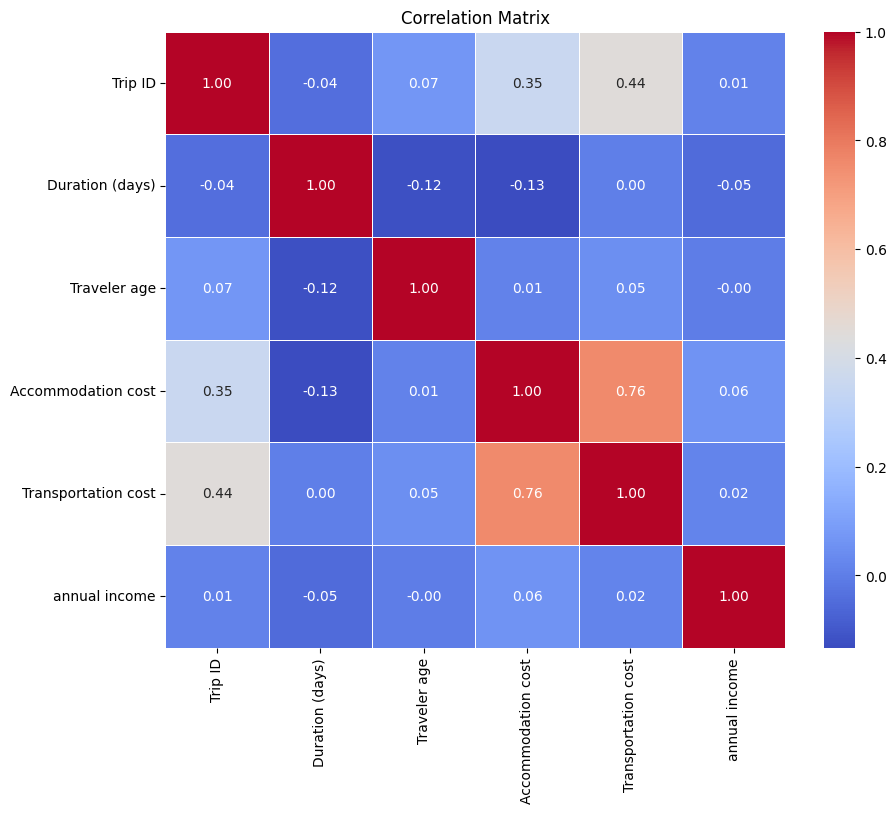

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data'
# If not, replace it with your DataFrame containing numerical columns

# Generate a correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()
